This assignment will be reviewed by peers based upon a given rubric. Make sure to keep your answers clear and concise while demonstrating an understanding of the material. Be sure to give all requested information in markdown cells. It is recommended to utilize Latex.

### Problem 1

The Birthday Problem: This is a classic problem that has a nonintuitive answer.  Suppose there are $N$ students in a room.

#### Part a)

What is the probability that at least two of them have the same birthday (month and day)?  (Assume that each day is equally likely to be a student's birthday, that there are no sets of twins, and that there are 365 days in the year. Do not include leap years).


\begin{align*}
    P(\text{At least two have same birthday}) &= ? \\
    &= \text{$1-\frac{365 \times 364\times...\times(365-n+1)}{365^n}$}
\end{align*}

#### Part b)

How large must $N$ be so that the probability that at least two of them have the same birthday is at least 1/2?

**Answer**: N must be at least 23.

#### Part c)

Plot the number of students on the $x$-axis versus the probability that at least two of them have the same birthday
on the $y$-axis.

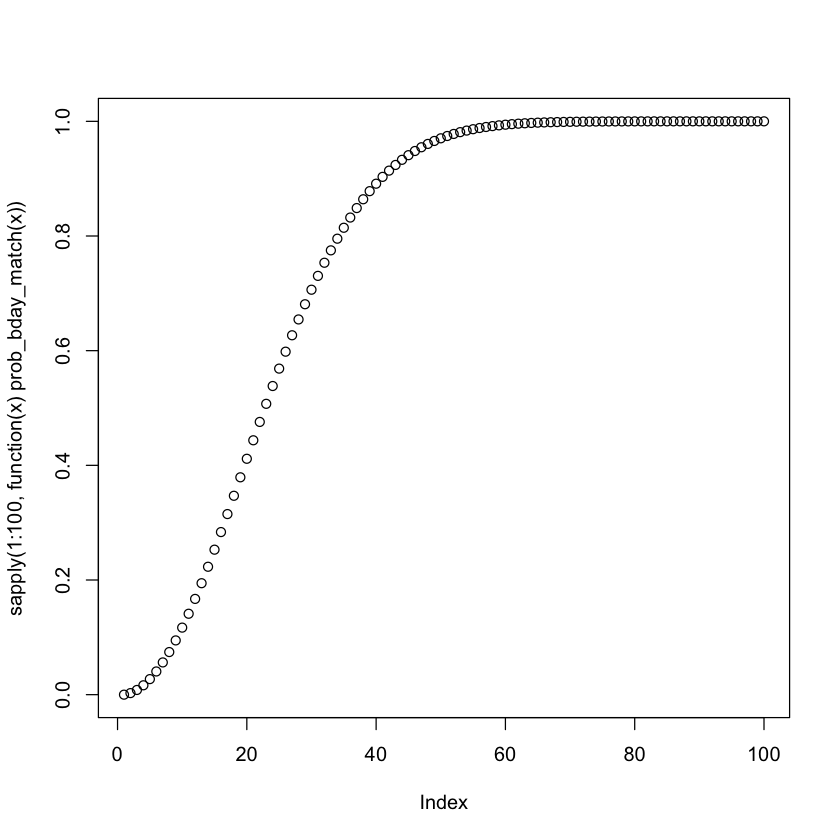

In [106]:
# write the birthday function in an R friendly way

prob_bday_match <- function(n) {
  return(1 - ((prod(365:(365 - n + 1)) /
              (365 ^ n)))
  )
}

plot(sapply(1:100, function(x) prob_bday_match(x)))

#### Thought Question (Ungraded)

Thought question (Ungraded): Would you be surprised if there were 100 students in the room and no two of them had the same birthday?  What
would that tell you about that set of students?

Very suprised, at ${N=100}$ there is nearly a 100% chance that 2 randomly selected students have the same birthday. It's hard to say what might have lead to this, but they could have been arrange by birthday prior to breaking into groups.

# Problem 2 

One of the most beneficial aspects of R, when it comes to probability, is that it allows us to simulate data and random events. In the following problem, you are going to become familiar with these simulation functions and techniques.

**Part a)** 

Let $X$ be a random variable for the number rolled on a fair, six-sided die. How would we go about simulating $X$?

Start by creating a list of numbers [1, 6]. Then use the `sample()` function with our list of numbers to simulate **a single** roll of the die, as in simulate $X$. We would recommend looking at the documentation for `sample()`, found [here](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/sample), or by executing `?sample` in a Jupyter cell.

In [107]:
# create a dice numbered 1 through 6
x <- c(1:6)

# sample it one time
sample(x, 1)

[1] 6

**Part b)** 

In our initial problem, we said that $X$ comes from a fair die, meaning each value is equally likely to be rolled. Because our die has $6$ sides, each side should appear about $1/6^{th}$ of the time. How would we confirm that our simulation is fair?

What if we generate multiple instances of $X$? That way, we could compare if the simulated probabilities match the theoretical probabilities (i.e. are all $1/6$).

Generate $12$ instances of $X$ and calculate the proportion of occurances for each face. Do your simulated results appear to come from a fair die? Now generate $120$ instances of $X$ and look at the proportion of each face. What do you notice?

Note: Each time you run your simulations, you will get different values. If you want to guarantee that your simulation will result in the same values each time, use the `set.seed()` function. This function will allow your simulations to be reproducable.

---
 **Answer note**: I set the number of rolls then plotted the function for two values of n for the sake of being explicit even though it's not the DRYest code. 


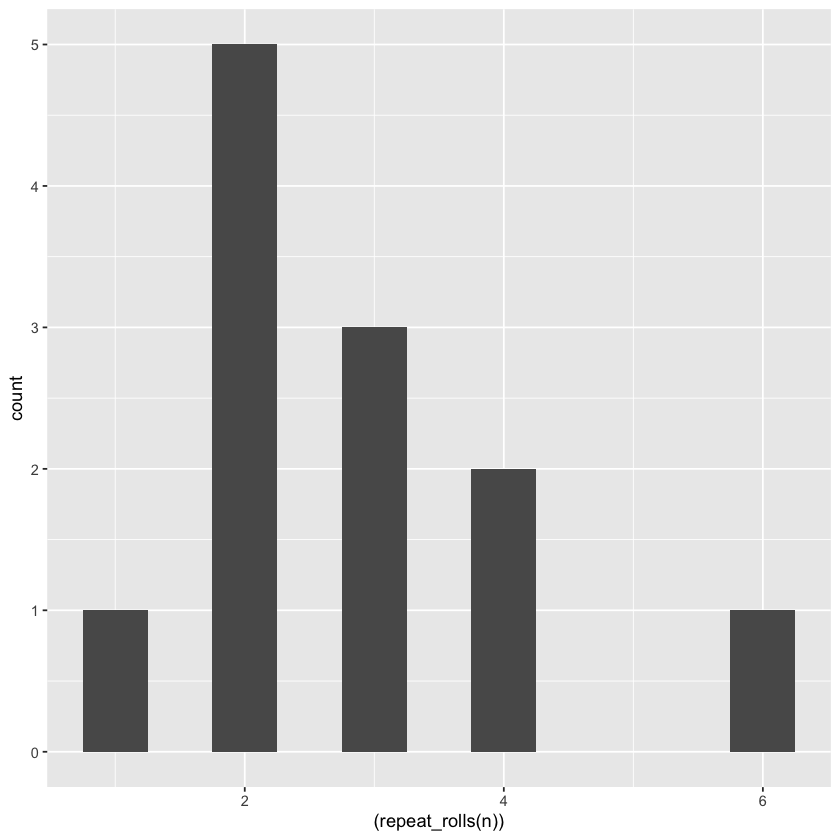

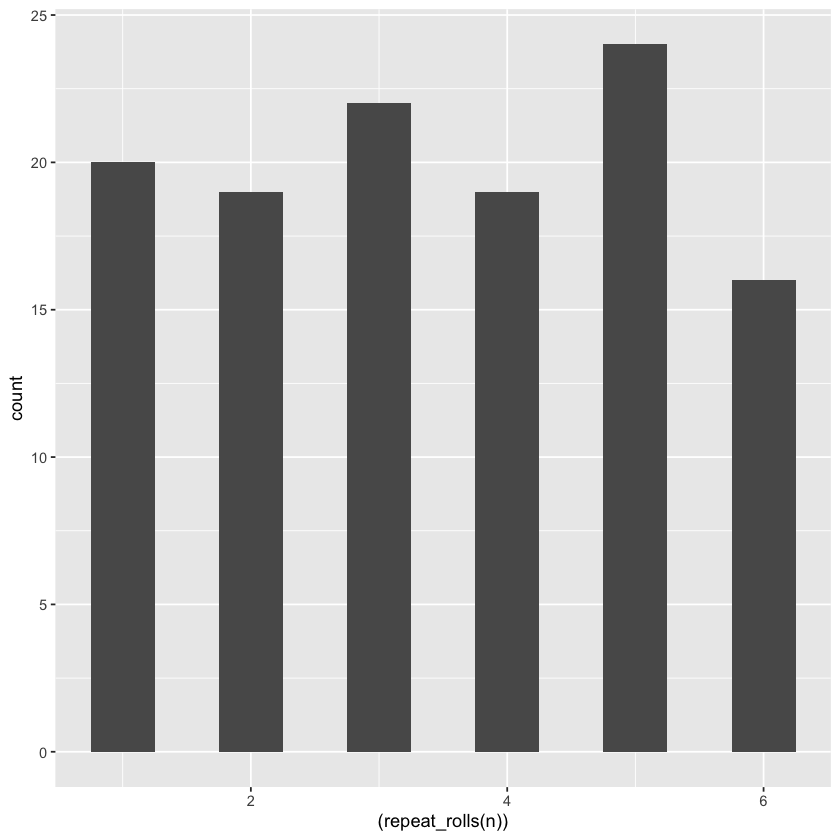

In [108]:
library(ggplot2)
set.seed(112358)

# a function that lets you roll the x-defined dice n number of times
repeat_rolls <- function(n) {
    replicate(n, sample(x, 1, replace = TRUE))
}

# 12 rolls
n <- 12

ggplot(
    data = NULL,
    aes(x = (repeat_rolls(n)))
) +
    geom_histogram(binwidth = 0.5)

# 120 rolls
n <- 120

ggplot(
    data = NULL,
    aes(x = (repeat_rolls(n)))
) +
    geom_histogram(binwidth = 0.5)


**Part c)** 

What if our die is not fair? How would we simulate that?

Let's assume that $Y$ comes from an unfair six-sided die, where $P(Y=3)=1/2$ and all other face values have an equal probability of occuring. Use the `sample()` function to simulate this situation. Then display the proportion of each face value, to confirm that the faces occur with the desired probabilities. Make sure that $n$ is large enough to be confident in your answer.

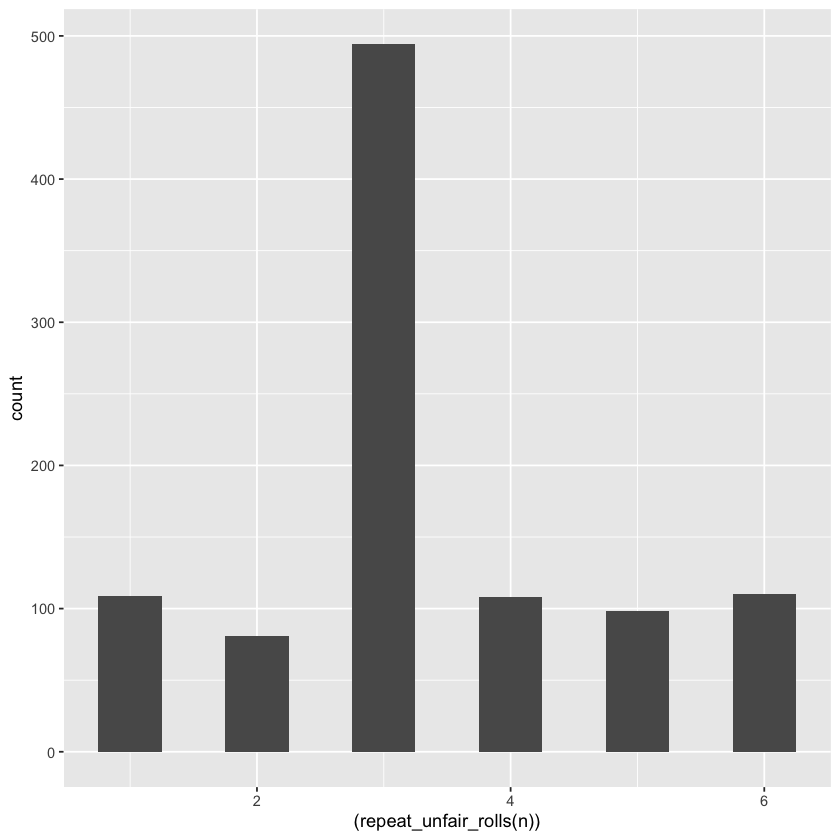

In [109]:
y <- c(1:6)

# Biased die function.
# The probabilities have least common denominators for clarity
repeat_unfair_rolls <- function(n) {
  replicate(
    n,
    sample(y, 1,
           replace = TRUE,
           prob = c(3 / 30, 3 / 30, 15 / 30, 3 / 30, 3 / 30, 3 / 30)
    )
)
}

n <- 1000

ggplot(
  data = NULL,
  aes(x = (repeat_unfair_rolls(n)))
) +
  geom_histogram(binwidth = 0.5)
